In [1]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Inside the network

In [22]:
column_types = {'device_model': 'str'}
df_access = pd.read_csv('access_point.csv', dtype=column_types)
df_doorbell = pd.read_csv('doorbell.csv', dtype=column_types)
df_laptop_7400 = pd.read_csv('laptop_7400.csv', dtype=column_types)
df_laptop_e64 = pd.read_csv('laptop_e64.csv', dtype=column_types)
df_lightbulb = pd.read_csv('lightbulb.csv', dtype=column_types)
df_samsung_web = pd.read_csv('samsung_web.csv', dtype=column_types)
df_smartphone_4 = pd.read_csv('smartphone_4.csv', dtype=column_types)
df_smartphone_5 = pd.read_csv('smartphone_5.csv', dtype=column_types)
df_socket = pd.read_csv('socket.csv', dtype=column_types)
df_speaker = pd.read_csv('speaker.csv', dtype=column_types)
df_streamer = pd.read_csv('streamer.csv', dtype=column_types)
df_webcam = pd.read_csv('webcam.csv', dtype=column_types)

df_2 = pd.concat([df_samsung_web, df_access, df_doorbell, df_laptop_7400, df_laptop_e64, df_lightbulb, df_smartphone_4, df_smartphone_5, df_socket, df_speaker, df_streamer, df_webcam], ignore_index=True)

nocolumns = ['IPV4_SRC_ADDR', 'MAC', 'IPV4_DST_ADDR', 'IP', 'partition', 'device_model', 'type', 'date']

df = df_2.drop(nocolumns, axis=1)

X = df.drop(columns='category', axis=1)
Y = df['category']

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=0)

# Model architecture with dropout for regularization
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[EarlyStopping(patience=5)])

accuracy = model.evaluate(X_test, y_test)[1]
print('Neural Network Accuracy: {:.2f}%'.format(accuracy * 100))

predictions = model.predict(X_test)
predictions_class = (predictions > 0.5).astype(int)
predictions_labels = label_encoder.inverse_transform(predictions_class)

Epoch 1/50
15653/15653 [==============================] - 100s 6ms/step - loss: 0.1680 - accuracy: 0.9333 - val_loss: 0.1051 - val_accuracy: 0.9571
Epoch 2/50
15653/15653 [==============================] - 100s 6ms/step - loss: 0.1108 - accuracy: 0.9549 - val_loss: 0.0932 - val_accuracy: 0.9601
Epoch 3/50
15653/15653 [==============================] - 101s 6ms/step - loss: 0.1009 - accuracy: 0.9578 - val_loss: 0.0863 - val_accuracy: 0.9633
Epoch 4/50
15653/15653 [==============================] - 99s 6ms/step - loss: 0.0931 - accuracy: 0.9607 - val_loss: 0.0798 - val_accuracy: 0.9674
Epoch 5/50
15653/15653 [==============================] - 97s 6ms/step - loss: 0.0890 - accuracy: 0.9639 - val_loss: 0.0750 - val_accuracy: 0.9717
Epoch 6/50
15653/15653 [==============================] - 99s 6ms/step - loss: 0.0838 - accuracy: 0.9671 - val_loss: 0.0704 - val_accuracy: 0.9741
Epoch 7/50
15653/15653 [==============================] - 100s 6ms/step - loss: 0.0819 - accuracy: 0.9688 - val_los

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
predictions_df = pd.DataFrame(predictions_labels, index=y_test, columns=['Predicted_Label'])

# Calculate metrics
accuracy_nn = accuracy_score(y_test, predictions_class)
precision_nn = precision_score(y_test, predictions_class, average='macro')
recall_nn = recall_score(y_test, predictions_class, average='macro')
f1_nn = f1_score(y_test, predictions_class, average='macro')

print('Neural Network Accuracy: {:.2f}%'.format(accuracy_nn * 100))
print('Neural Network Precision: {:.2f}%'.format(precision_nn*100))
print('Neural Network Recall: {:.2f}%'.format(recall_nn*100))
print('Neural Network F1 Score: {:.2f}%'.format(f1_nn*100))

Neural Network Accuracy: 97.90%
Neural Network Precision: 96.15%
Neural Network Recall: 92.46%
Neural Network F1 Score: 94.20%


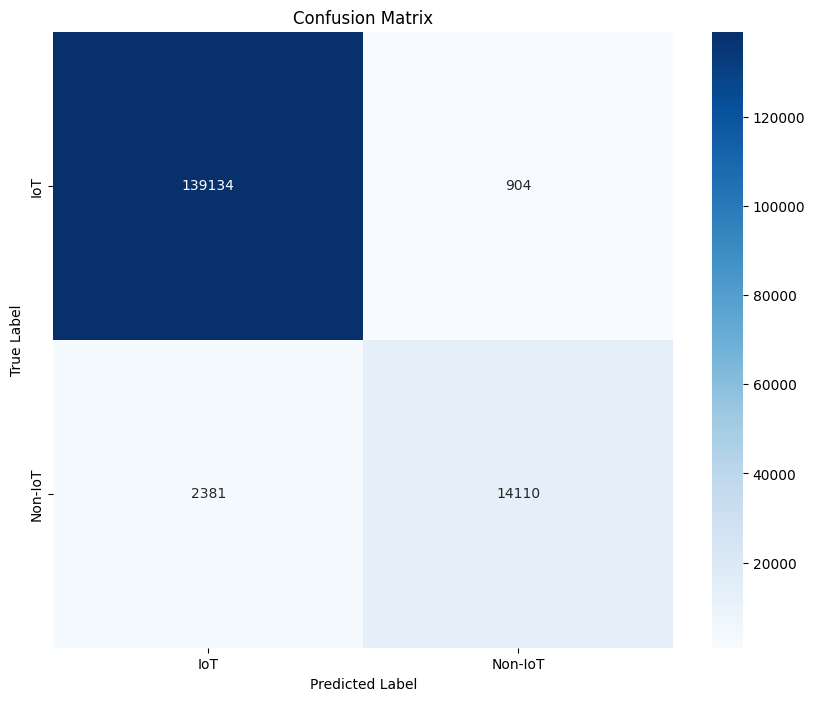

In [25]:
conf_matrix = confusion_matrix(y_test, predictions_class)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Outside the network

In [18]:
column_types = {'device_model': 'str'}
df_access = pd.read_csv('access_point.csv', dtype=column_types)
df_doorbell = pd.read_csv('doorbell.csv', dtype=column_types)
df_laptop_7400 = pd.read_csv('laptop_7400.csv', dtype=column_types)
df_laptop_e64 = pd.read_csv('laptop_e64.csv', dtype=column_types)
df_lightbulb = pd.read_csv('lightbulb.csv', dtype=column_types)
df_samsung_web = pd.read_csv('samsung_web.csv', dtype=column_types)
df_smartphone_4 = pd.read_csv('smartphone_4.csv', dtype=column_types)
df_smartphone_5 = pd.read_csv('smartphone_5.csv', dtype=column_types)
df_socket = pd.read_csv('socket.csv', dtype=column_types)
df_speaker = pd.read_csv('speaker.csv', dtype=column_types)
df_streamer = pd.read_csv('streamer.csv', dtype=column_types)
df_webcam = pd.read_csv('webcam.csv', dtype=column_types)

df_2 = pd.concat([df_samsung_web, df_access, df_doorbell, df_laptop_7400, df_laptop_e64, df_lightbulb, df_smartphone_4, df_smartphone_5, df_socket, df_speaker, df_streamer, df_webcam], ignore_index=True)

nocolumns = ['IPV4_SRC_ADDR', 'MAC', 'IPV4_DST_ADDR', 'IP', 'partition', 'device_model', 'type', 'date', 'LAST_SWITCHED', 'FIRST_SWITCHED', 'SRC_TOS', 'SRC_AS', 'DST_AS']

df = df_2.drop(nocolumns, axis=1)

X = df.drop(columns='category', axis=1)
Y = df['category']

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=0)

# Model architecture with dropout for regularization
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[EarlyStopping(patience=15)])

accuracy = model.evaluate(X_test, y_test)[1]
print('Neural Network Accuracy: {:.2f}%'.format(accuracy * 100))

predictions = model.predict(X_test)
predictions_class = (predictions > 0.5).astype(int)
predictions_labels = label_encoder.inverse_transform(predictions_class)

Epoch 1/50
15653/15653 [==============================] - 108s 7ms/step - loss: 0.1687 - accuracy: 0.9331 - val_loss: 0.1042 - val_accuracy: 0.9555
Epoch 2/50
15653/15653 [==============================] - 104s 7ms/step - loss: 0.1123 - accuracy: 0.9532 - val_loss: 0.0981 - val_accuracy: 0.9598
Epoch 3/50
15653/15653 [==============================] - 106s 7ms/step - loss: 0.1034 - accuracy: 0.9558 - val_loss: 0.0905 - val_accuracy: 0.9602
Epoch 4/50
15653/15653 [==============================] - 100s 6ms/step - loss: 0.0958 - accuracy: 0.9592 - val_loss: 0.0829 - val_accuracy: 0.9673
Epoch 5/50
15653/15653 [==============================] - 103s 7ms/step - loss: 0.0895 - accuracy: 0.9637 - val_loss: 0.0782 - val_accuracy: 0.9695
Epoch 6/50
15653/15653 [==============================] - 99s 6ms/step - loss: 0.0872 - accuracy: 0.9661 - val_loss: 0.0747 - val_accuracy: 0.9709
Epoch 7/50
15653/15653 [==============================] - 102s 6ms/step - loss: 0.0829 - accuracy: 0.9680 - val_l

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
predictions_df = pd.DataFrame(predictions_labels, index=y_test, columns=['Predicted_Label'])

# Calculate metrics
accuracy_nn = accuracy_score(y_test, predictions_class)
precision_nn = precision_score(y_test, predictions_class, average='macro')
recall_nn = recall_score(y_test, predictions_class, average='macro')
f1_nn = f1_score(y_test, predictions_class, average='macro')

print('Neural Network Accuracy: {:.2f}%'.format(accuracy_nn * 100))
print('Neural Network Precision: {:.2f}%'.format(precision_nn*100))
print('Neural Network Recall: {:.2f}%'.format(recall_nn*100))
print('Neural Network F1 Score: {:.2f}%'.format(f1_nn*100))

Neural Network Accuracy: 97.78%
Neural Network Precision: 95.92%
Neural Network Recall: 91.98%
Neural Network F1 Score: 93.84%


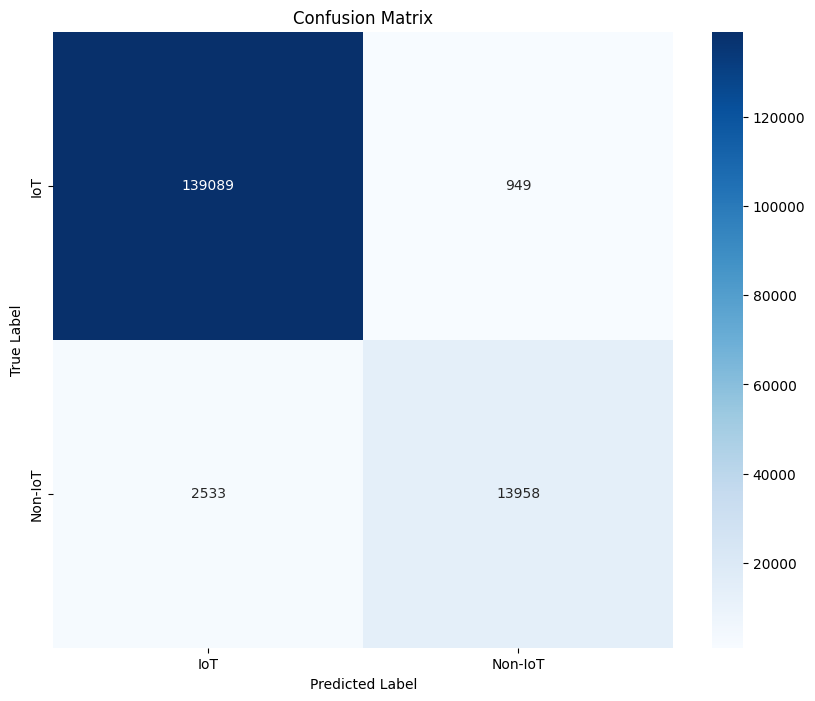

In [21]:
conf_matrix = confusion_matrix(y_test, predictions_class)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()